# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())

mice_count

249

In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_data = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

grouped_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
grouped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mice by their IDs
clean_combined_data = combined_data.loc[combined_data["Mouse ID"] !="g989"] #For multiple entries use isin function ~combined_data["Mouse ID"].isin([]) 

# Display the clean DataFrame without duplicate mice
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_combined_data["Mouse ID"].unique())

mice_count

248

## Summary Statistics

In [65]:

# Assuming 'clean_combined_data' is your DataFrame without duplicate mice

# Group by 'Drug Regimen'
grouped_data = clean_combined_data.groupby('Drug Regimen')

# Calculate mean for each regimen
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()

# Calculate median for each regimen
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()

# Calculate variance for each regimen
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()

# Calculate standard deviation for each regimen
std_deviation_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()

# Calculate SEM for each regimen
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Std Deviation': std_deviation_tumor_volume,
    'SEM': sem_tumor_volume
})

# Display the summary statistics table
summary_statistics

Summary Statistics Table:
                   Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


grouped_data = clean_combined_data.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Calculate mean for each regimen
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()

# Calculate median for each regimen
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()

# Calculate variance for each regimen
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()

# Calculate standard deviation for each regimen
std_deviation_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()

# Calculate SEM for each regimen
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std Deviation': std_deviation_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

# Assemble the resulting series into a single summary DataFrame.

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


summary_statistics = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Deviation', 'Tumor Volume Std. Err.']

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

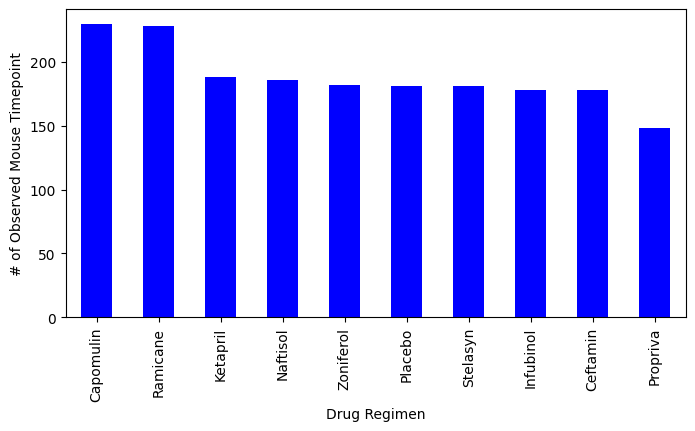

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_combined_data['Drug Regimen'].value_counts()

# Plot the bar chart
regimen_counts.plot(kind='bar', color='blue', figsize=(8, 4))

# Set chart title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')

# Show the plot
plt.show()

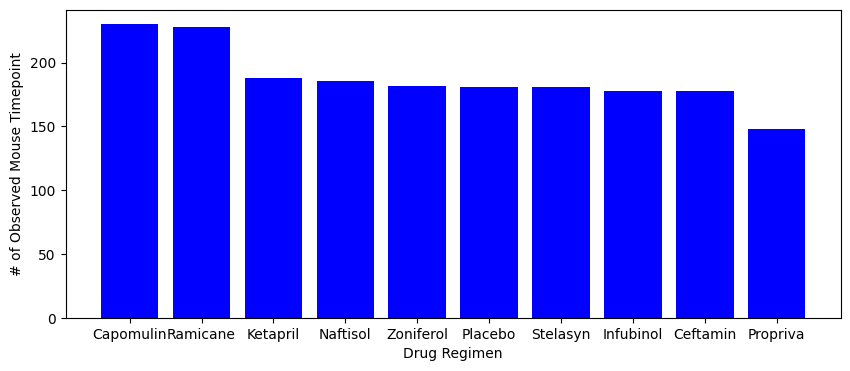

In [88]:
# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_combined_data['Drug Regimen'].value_counts()

# Create a bar plot using Pyplot
plt.figure(figsize=(10, 4))
plt.bar(regimen_counts.index, regimen_counts, color='blue')

# Set chart title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')

# Show the plot
plt.show()

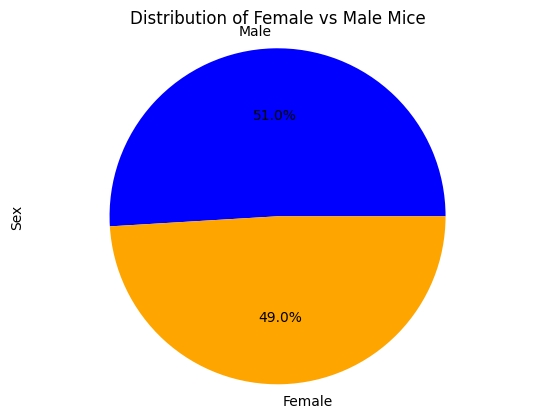

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by 'Sex' and count the number of mice in each category
gender_distribution = clean_combined_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  
plt.ylabel('Sex')
plt.show()

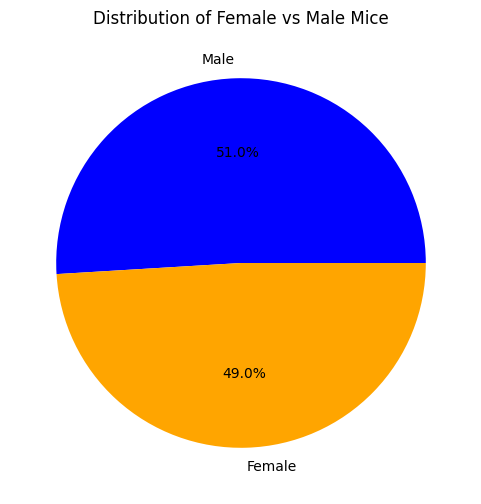

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by 'Sex' and count the number of mice for each gender
gender_distribution = clean_combined_data['Sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens =  pd.DataFrame(clean_combined_data.loc[(clean_combined_data['Drug Regimen'] == 'Capomulin') 
                                           | (clean_combined_data['Drug Regimen'] == 'Ramicane') 
                                           | (clean_combined_data['Drug Regimen'] == 'Infubinol') 
                                           | (clean_combined_data['Drug Regimen'] == 'Ceftamin'), :])

# # Start by getting the last (greatest) timepoint for each mouse
sample_max_time = pd.DataFrame(sample_drugs.groupby(['Mouse ID', 'Drug Regimen']).max()['Timepoint'])
sample_max_time = sample_max_time.rename(columns = {'Timepoint': 'Max Timepoint'})

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# # I ended up merging the maximum values to a DF only containing the sample drug regimens. 

sample_merge = pd.merge(sample_drugs, sample_max_time, how = 'left', on = ['Mouse ID', 'Drug Regimen'])
sample_merge['Tumor Volume (mm3)'] = sample_merge['Tumor Volume (mm3)'].round(3)
sample_merge = sample_merge.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume'})

# # Find and store the final tumor volumes (added as new column in next merge)
final_volume = sample_merge.sort_values(['Timepoint'], ascending = False)
final_volume = final_volume.drop_duplicates(subset = ['Mouse ID', 'Drug Regimen'], keep = 'first')
final_volume = final_volume.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume', 'Drug Regimen', 'Max Timepoint']]
final_volume = pd.DataFrame(final_volume)
final_volume = final_volume.rename(columns = {'Tumor Volume': 'Final Volume'})
final_volume = final_volume.loc[:, ['Mouse ID', 'Final Volume', 'Drug Regimen', 'Max Timepoint']]

# # merge round 2
sample_merge_two = pd.merge(sample_merge, final_volume, how = 'left', on = ['Mouse ID', 'Drug Regimen'])
sample_merge_two = sample_merge_two.sort_values(['Timepoint'], ascending = False)
final_sample_merge = sample_merge_two.drop_duplicates(subset = ['Mouse ID', 'Drug Regimen'], keep = 'first')




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites,Max Timepoint_x,Final Volume,Max Timepoint_y
813,z581,Infubinol,Female,24,25,45,62.754,3,45,62.754,45
543,e476,Infubinol,Male,23,26,45,62.435,1,45,62.435,45
154,c758,Ramicane,Male,9,17,45,33.398,1,45,33.398,45
440,i557,Capomulin,Female,1,24,45,47.686,1,45,47.686,45
144,m957,Capomulin,Female,3,19,45,33.329,1,45,33.329,45
...,...,...,...,...,...,...,...,...,...,...,...
648,m756,Infubinol,Male,19,30,5,47.010,1,5,47.010,5
753,x226,Ceftamin,Male,23,28,0,45.000,0,0,45.000,0
501,b447,Ceftamin,Male,2,30,0,45.000,0,0,45.000,0
712,t573,Ceftamin,Female,15,27,0,45.000,0,0,45.000,0


In [123]:

# Put treatments into a list for for loop (and later for plot labels)
example_drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

for drug in example_drug_regimen:

# Create empty list to fill with tumor vol data (for plotting)
    tumor_data_volumes = []
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_drug_reg = final_sample_merge[final_sample_merge['Drug Regimen'] == drug]
    tumor_data_volumes.extend(mice_on_drug_reg['Final Volume'].tolist())
    
    # add subset 
    tumor_data_series = pd.Series(tumor_data_volumes)
    
    # Determine outliers using upper and lower bounds
    
    first_quartile = tumor_data_series.quantile(0.25)
    third_quartile = tumor_data_series.quantile(0.75)
    iqr_for_drugs = third_quartile - first_quartile
    
    lower_bound_drugs = first_quartile - (1.5 * iqr_for_drugs)
    upper_bound_drugs = third_quartile + (1.5 * iqr_for_drugs)
    
    outliers = tumor_data_series.loc[(tumor_data_series < lower_bound_drugs)]

    print(f"Outliers for {drug}: {outliers.tolist()}")

Outliers for Capomulin: []
Outliers for Ramicane: []
Outliers for Infubinol: [36.321]
Outliers for Ceftamin: []


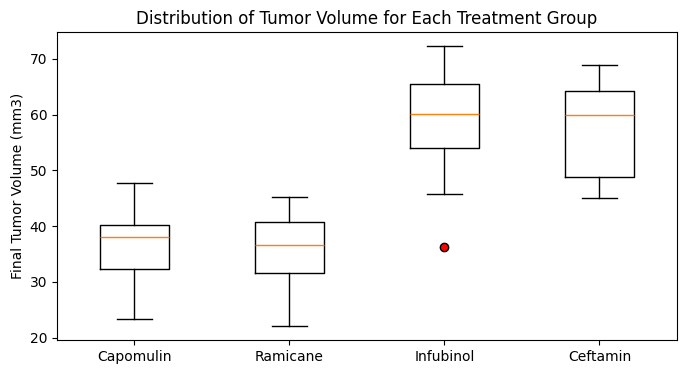

In [128]:

# Put treatments into a list for a for loop (and later for plot labels)
example_drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to store tumor volume data for each treatment group
tumor_data_volumes = []

# Iterate through each drug regimen
for drug in example_drug_regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_drug_reg = final_sample_merge[final_sample_merge['Drug Regimen'] == drug]
    tumor_data_volumes.append(mice_on_drug_reg['Final Volume'].tolist())

# Generate a box plot
plt.figure(figsize=(8, 4))
plt.boxplot(tumor_data_volumes, labels=example_drug_regimen, flierprops=dict(markerfacecolor='red', marker='o'))

# Set chart title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

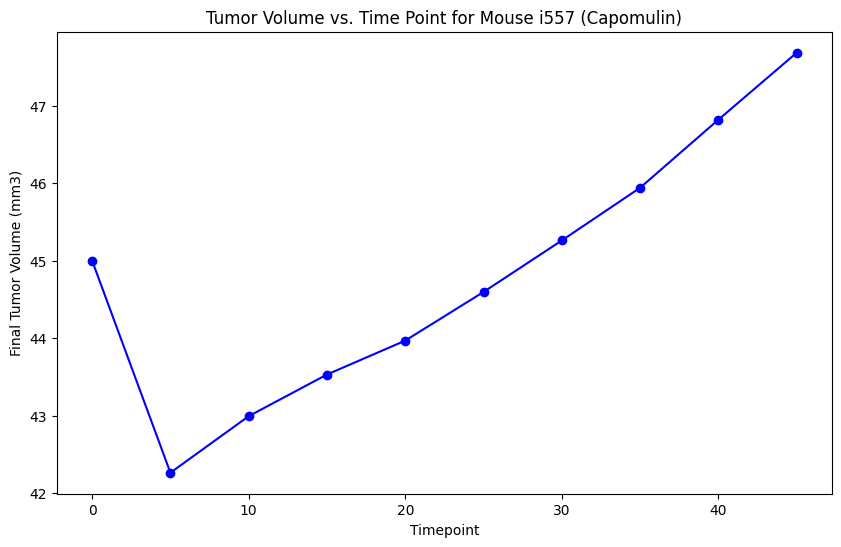

In [147]:
# Select data for Capomulin
drug_data = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == 'Capomulin']

# Select data for a specific mouse (replace 'your_mouse_id' with the actual Mouse ID)
selected_mouse_id = 'i557'
mouse_data = drug_data.loc[drug_data['Mouse ID'] == selected_mouse_id]

# Generate a line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Set chart title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

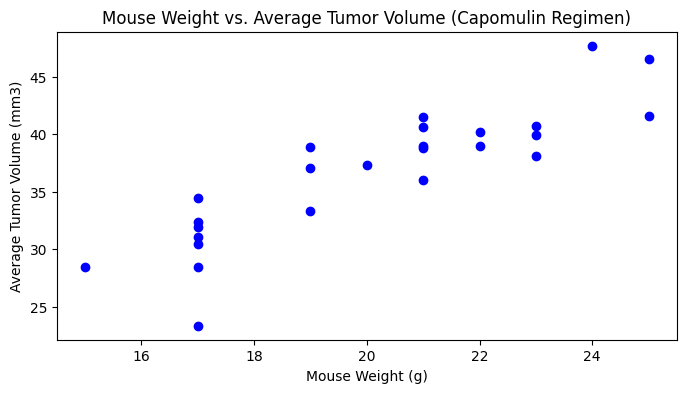

In [150]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Select data for Capomulin
capomulin_data = final_sample_merge[final_sample_merge['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Final Volume'].mean()

# Extract mouse weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')

# Set chart title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


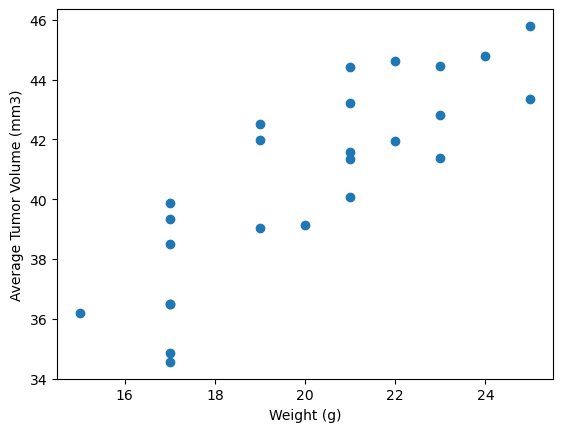

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


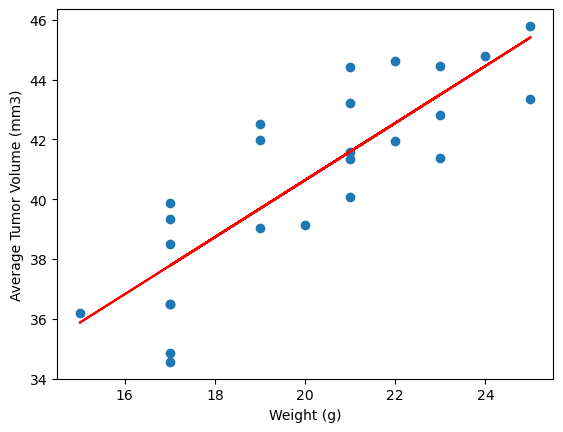

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


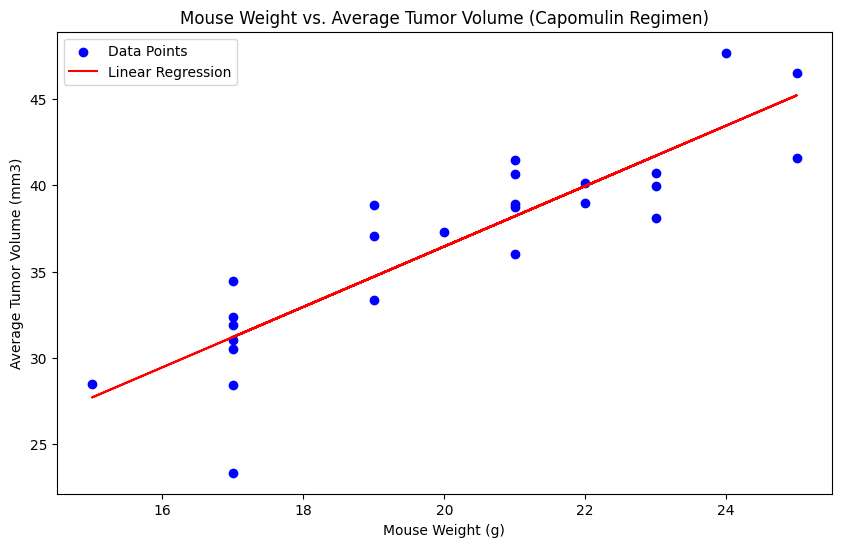

Correlation Coefficient: 0.8767134883455387


In [154]:

from scipy.stats import linregress

# Select data for Capomulin
capomulin_data = final_sample_merge[final_sample_merge['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Final Volume'].mean()

# Extract mouse weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a DataFrame with mouse weight and average tumor volume
data = pd.DataFrame({'Mouse Weight': mouse_weights, 'Average Tumor Volume': average_tumor_volume})

# Calculate the correlation coefficient
correlation_coefficient = data['Mouse Weight'].corr(data['Average Tumor Volume'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(data['Mouse Weight'], data['Average Tumor Volume'])

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Mouse Weight'], data['Average Tumor Volume'], marker='o', color='b', label='Data Points')

# Plot the linear regression line
regress_line = slope * data['Mouse Weight'] + intercept
plt.plot(data['Mouse Weight'], regress_line, color='r', label='Linear Regression')

# Set chart title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add legend
plt.legend()

# Show the plot

plt.show()

# Display correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient}')